## Replace missing values by (Mean, Median & Mode)

In [1]:
#import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read Data using pandas
df=pd.read_csv("./dataset/train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
#shape of data
df.shape

(1460, 81)

In [4]:
#Data of first 10 rows
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [5]:
#to see all 81 columns
pd.set_option('display.max_columns',None)
#to see all 81 columns row-wise'
pd.set_option('display.max_rows',None)

In [6]:
#to get number of null values columnwise
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#percentage of null values columnwise
null_vars=df.isnull().sum()/df.shape[0]*100
null_vars

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
#columns which have null values greater than 15 percent
drop_columns=null_vars[null_vars>15].keys()
#keys() represent columns
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
#drop columns which has null values > 15%
df_clean1=df.drop(columns=drop_columns)
df_clean1

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
30      31          70  C (all)     8500   Pave      Reg         Lvl   
31      32          20       RL     8544   Pave      IR1         Lvl   
32      33          20       RL    11049   Pave      Reg         Lvl   
33      34          20       RL    10552   Pave      IR1         Lvl   
34      35         120       RL     7313   Pave      Reg         Lvl   
35      36          60       RL    13418   Pave      Reg         Lvl   
36      37          20       RL    10859   Pave      Reg         Lvl   
37      38          20       RL     8532   Pave      Reg         Lvl   
38      39          20       RL     7922   Pave      Reg         Lvl   
39      40          90       RL     6040   Pave      Reg         Lvl   
40      41          20       RL     8658   Pave      Reg         Lvl   
41      42          20       RL    16905   Pave      Reg         Lvl   
42      43          85       RL     9180   Pave      IR1         Lvl   
43      44          20       RL     9200   Pave      IR1         Lvl   
44      45          20       RL     7945   Pave      Reg         Lvl   
45      46         120       RL     7658   Pave      Reg         Lvl   
46      47          50       RL    12822   Pave      IR1         Lvl   
47      48          20       FV    11096   Pave      Reg         Lvl   
48      49         190       RM     4456   Pave      Reg         Lvl   
49      50          20       RL     7742   Pave      Reg         Lvl   
50      51          60       RL    13869   Pave      IR2         Lvl   
51      52          50       RM     6240   Pave      Reg         Lvl   
52      53          90       RM     8472   Grvl      IR2         Bnk   
53      54          20       RL    50271   Pave      IR1         Low   
54      55          80       RL     7134   Pave 

In [10]:
df_clean1.shape

(1460, 75)

In [11]:
#Seelsct only numerical data to remove missing value from it
only_numerical_data=df_clean1.select_dtypes(include=['int64','float64'])
only_numerical_data.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

<AxesSubplot:>

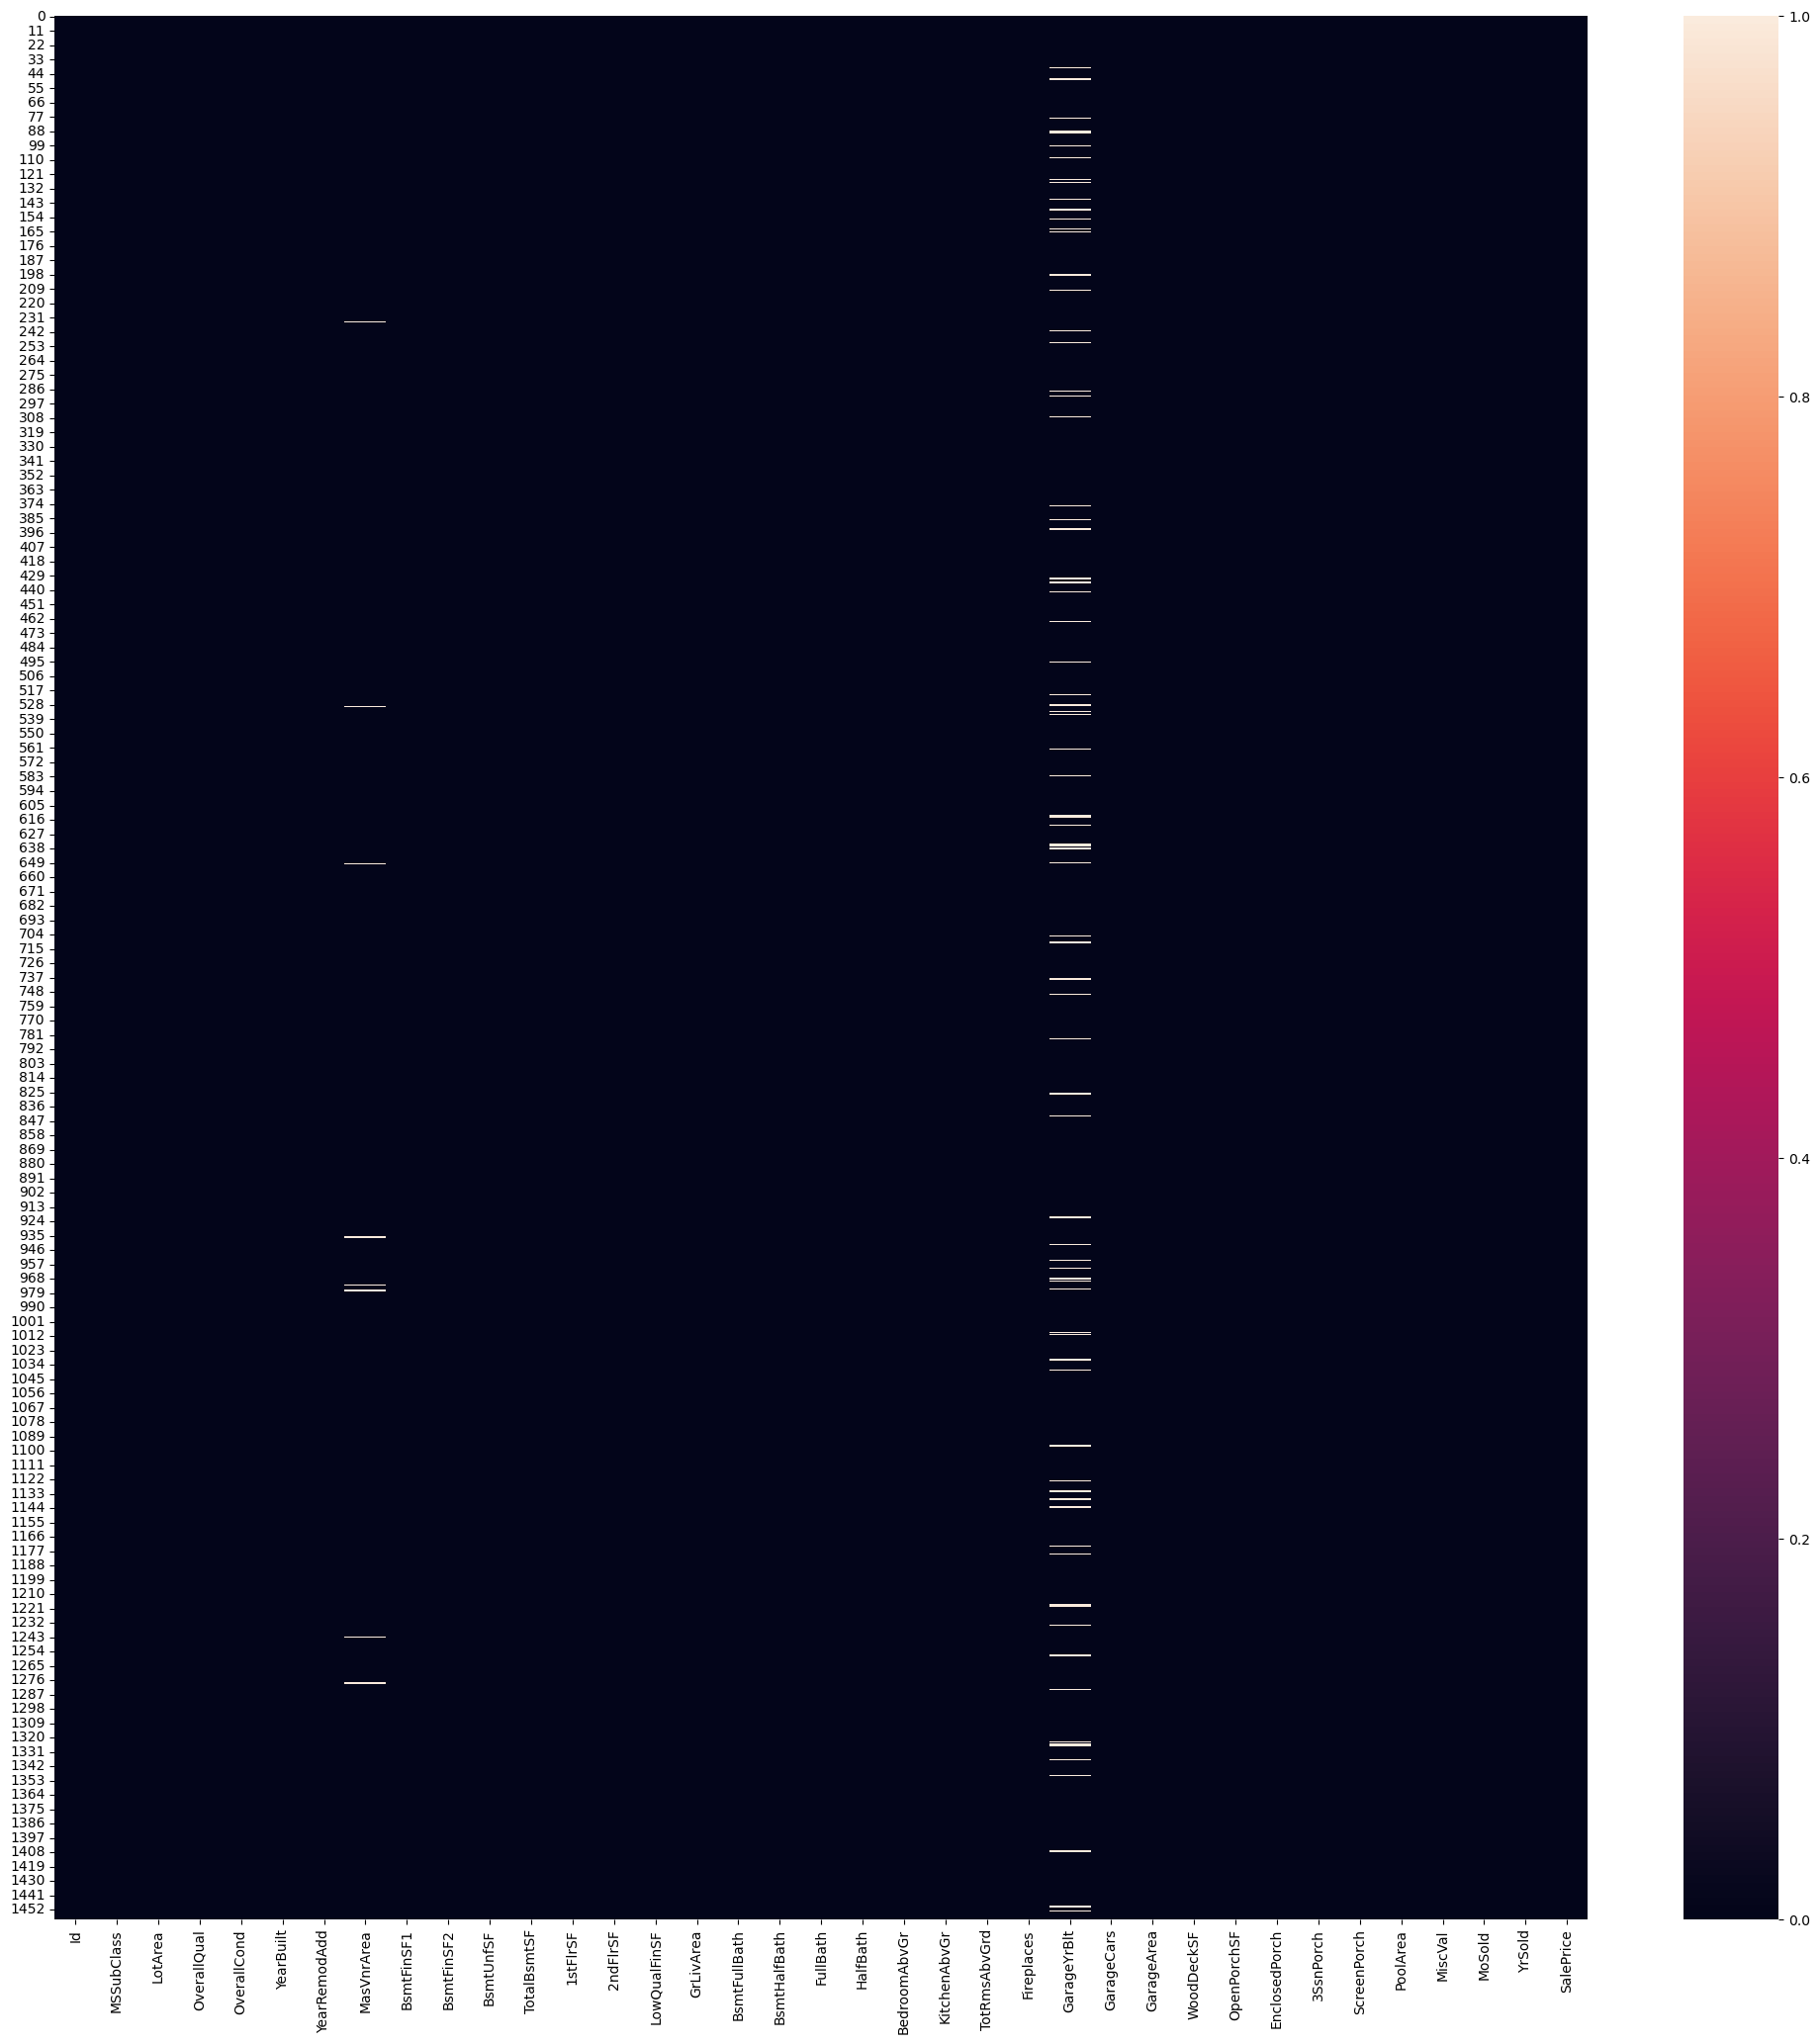

In [12]:
#vizualise null values
plt.figure(figsize=(25,25))
sns.heatmap(only_numerical_data.isnull())

In [13]:
#Print rows which has null values
only_numerical_data[only_numerical_data.isnull().any(axis=1)]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
39      40          90     6040            4            5       1955   
48      49         190     4456            4            5       1920   
78      79          90    10778            4            5       1968   
88      89          50     8470            3            2       1915   
89      90          20     8070            4            5       1994   
99     100          20     9320            4            5       1959   
108    109          50     8500            5            7       1919   
125    126         190     6780            6            8       1935   
127    128          45     4388            5            7       1930   
140    141          20    10500            4            5       1971   
148    149          20     7500            7            5       2004   
155    156          50     9600            6            5       1924   
163    164          45     5500            4            6       1956   
165    166         190    10106            5            7       1940   
198    199          75     5520            6            6       1912   
210    211          30     5604            5            6       1925   
234    235          60     7851            6            5       2002   
241    242          30     3880            5            9       1945   
250    251          30     5350            3            2       1940   
287    288          20     8125            4            4       1971   
291    292         190     5687            5            6       1912   
307    308          50     7920            6            7       1920   
375    376          30    10020            1            1       1922   
386    387          50     8410            5            3       1910   
393    394          30     7446            4            5       1941   
431    432          50     5586            6            7       1920   
434    435         180     1890            4            7       1972   
441    442          90    12108            4            4       1955   
464    465          20     8430            5            5       1978   
495    496          30     7879            4            5       1920   
520    521         190    10800            4            7       1900   
528    529          30     9098            4            7       1920   
529    530          20    32668            6            3       1957   
533    534          20     5000            1            3       1946   
535    536         190     7000            5            7       1910   
562    563          30    13907            5            6       1940   
582    583          90    11841            6            5       1990   
613    614          20     8402            5            5       2007   
614    615         180     1491            4            6       1972   
620    621          30     8248            3            3       1914   
635    636         190    10896            6            7       1914   
636    637          30     6120            2            3       1936   
638    639          30     8777            5            7       1910   
649    650         180     1936            4            6       1970   
650    651          60     8125            7            6       2007   
705    706         190     5600            4            5       1930   
710    711          30     4130            3            6       1935   
738    739          90    10800            5            5       1987   
750    751          50     8800            4            7       1910   
784    785          75     6300            6            6       1914   
826    827          45     6130            5            6       1924   
843    844          90     8000            5            4       1961   
921    922          90     8777            5            7       1900   
936    937          20    10083            7            5       2003   
942    943          90     7711            4    

In [14]:
only_numerical_data.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [15]:
#get columns names which has null values
missing_num_var=[var for var in only_numerical_data.columns
                          if only_numerical_data[var].isnull().sum()>0
                 #For loop & If condition in one paragraph
                 ]
missing_num_var

['MasVnrArea', 'GarageYrBlt']

## Inserting Mean Median & Mode

#### Before inserting mean,median & mode 
###### we have to check distribution plot of every column and acording to their shape we will replace empty values by Mean Median Or Mode

C:\Users\Omkar Khade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Khade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


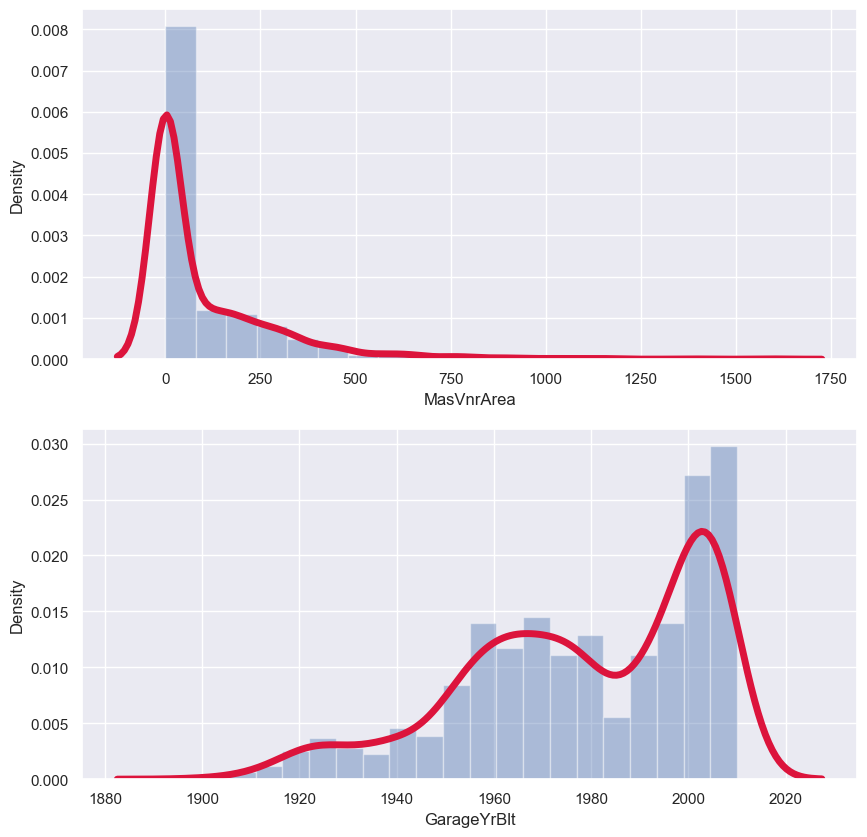

In [16]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,1,i+1)
    sns.distplot(only_numerical_data[var],bins=20,kde_kws={'linewidth':5,'color':'#DC143C'})

#### ==> You can use mean value to replace the missing values in case the data distribution is symmetric(Normal Distribution)

#### ==> Consider using median or mode with skewed data distribution.

In [17]:
# we have got skewed data distribution in both graphs
# so we should use median method here 
# TO see difference we are using both methods

In [18]:
only_numerical_data

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
5        6          50    14115            5            5       1993   
6        7          20    10084            8            5       2004   
7        8          60    10382            7            6       1973   
8        9          50     6120            7            5       1931   
9       10         190     7420            5            6       1939   
10      11          20    11200            5            5       1965   
11      12          60    11924            9            5       2005   
12      13          20    12968            5            6       1962   
13      14          20    10652            7            5       2006   
14      15          20    10920            6            5       1960   
15      16          45     6120            7            8       1929   
16      17          20    11241            6            7       1970   
17      18          90    10791            4            5       1967   
18      19          20    13695            5            5       2004   
19      20          20     7560            5            6       1958   
20      21          60    14215            8            5       2005   
21      22          45     7449            7            7       1930   
22      23          20     9742            8            5       2002   
23      24         120     4224            5            7       1976   
24      25          20     8246            5            8       1968   
25      26          20    14230            8            5       2007   
26      27          20     7200            5            7       1951   
27      28          20    11478            8            5       2007   
28      29          20    16321            5            6       1957   
29      30          30     6324            4            6       1927   
30      31          70     8500            4            4       1920   
31      32          20     8544            5            6       1966   
32      33          20    11049            8            5       2007   
33      34          20    10552            5            5       1959   
34      35         120     7313            9            5       2005   
35      36          60    13418            8            5       2004   
36      37          20    10859            5            5       1994   
37      38          20     8532            5            6       1954   
38      39          20     7922            5            7       1953   
39      40          90     6040            4            5       1955   
40      41          20     8658            6            5       1965   
41      42          20    16905            5            6       1959   
42      43          85     9180            5            7       1983   
43      44          20     9200            5            6       1975   
44      45          20     7945            5            6       1959   
45      46         120     7658            9            5       2005   
46      47          50    12822            7            5       2003   
47      48          20    11096            8            5       2006   
48      49         190     4456            4            5       1920   
49      50          20     7742            5            7       1966   
50      51          60    13869            6            6       1997   
51      52          50     6240            6            6       1934   
52      53          90     8472            5            5       1963   
53      54          20    50271            9            5       1981   
54      55          80     7134            5    

In [19]:
#Fill NaN values by Median
df_clean2__median=only_numerical_data.fillna(only_numerical_data.median())
df_clean2__median.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [20]:
#Fill NaN values by Mean
df_clean2__Mean=only_numerical_data.fillna(only_numerical_data.mean())
df_clean2__Mean.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
# Numerical data is cleaned now

In [22]:
#values before and after data cleaning 

In [23]:
 df_concat = pd.concat([only_numerical_data[missing_num_var],   df_clean2__Mean[missing_num_var],    df_clean2__median[missing_num_var]], axis=1)

In [24]:
df_concat[df_concat.isnull().any(axis=1)]

MasVnrArea  GarageYrBlt  MasVnrArea  GarageYrBlt  MasVnrArea  \
39           0.0          NaN    0.000000  1978.506164         0.0   
48           0.0          NaN    0.000000  1978.506164         0.0   
78           0.0          NaN    0.000000  1978.506164         0.0   
88           0.0          NaN    0.000000  1978.506164         0.0   
89           0.0          NaN    0.000000  1978.506164         0.0   
99           0.0          NaN    0.000000  1978.506164         0.0   
108          0.0          NaN    0.000000  1978.506164         0.0   
125          0.0          NaN    0.000000  1978.506164         0.0   
127          0.0          NaN    0.000000  1978.506164         0.0   
140          0.0          NaN    0.000000  1978.506164         0.0   
148        120.0          NaN  120.000000  1978.506164       120.0   
155          0.0          NaN    0.000000  1978.506164         0.0   
163          0.0          NaN    0.000000  1978.506164         0.0   
165          0.0          NaN    0.000000  1978.506164         0.0   
198          0.0          NaN    0.000000  1978.506164         0.0   
210          0.0          NaN    0.000000  1978.506164         0.0   
234          NaN       2002.0  103.685262  2002.000000         0.0   
241          0.0          NaN    0.000000  1978.506164         0.0   
250          0.0          NaN    0.000000  1978.506164         0.0   
287          0.0          NaN    0.000000  1978.506164         0.0   
291          0.0          NaN    0.000000  1978.506164         0.0   
307          0.0          NaN    0.000000  1978.506164         0.0   
375          0.0          NaN    0.000000  1978.506164         0.0   
386          0.0          NaN    0.000000  1978.506164         0.0   
393          0.0          NaN    0.000000  1978.506164         0.0   
431          0.0          NaN    0.000000  1978.506164         0.0   
434          0.0          NaN    0.000000  1978.506164         0.0   
441        270.0          NaN  270.000000  1978.506164       270.0   
464        136.0          NaN  136.000000  1978.506164       136.0   
495          0.0          NaN    0.000000  1978.506164         0.0   
520          0.0          NaN    0.000000  1978.506164         0.0   
528          0.0          NaN    0.000000  1978.506164         0.0   
529          NaN       1975.0  103.685262  1975.000000         0.0   
533          0.0          NaN    0.000000  1978.506164         0.0   
535          0.0          NaN    0.000000  1978.506164         0.0   
562          0.0          NaN    0.000000  1978.506164         0.0   
582        104.0          NaN  104.000000  1978.506164       104.0   
613          0.0          NaN    0.000000  1978.506164         0.0   
614          0.0          NaN    0.000000  1978.506164         0.0   
620          0.0          NaN    0.000000  1978.506164         0.0   
635          0.0          NaN    0.000000  1978.506164         0.0   
636          0.0          NaN    0.000000  1978.506164         0.0   
638          0.0          NaN    0.000000  1978.506164         0.0   
649          0.0          NaN    0.000000  1978.506164         0.0   
650          NaN       2007.0  103.685262  2007.000000         0.0   
705          0.0          NaN    0.000000  1978.506164         0.0   
710          0.0          NaN    0.000000  1978.506164         0.0   
738          0.0          NaN    0.000000  1978.506164         0.0   
750          0.0          NaN    0.000000  1978.506164         0.0   
784          0.0          NaN    0.000000  1978.506164         0.0   
826          0.0          NaN    0.000000  1978.506164         0.0   
843          0.0          NaN    0.000000  1978.506164         0.0   
921          0.0          NaN    0.000000  1978.506164         0.0   
936          NaN       2003.0  103.685262  2003.000000         0.0   
942          0.0          NaN    0.000000  1978.506164         0.0   
954        250.0          NaN  250.000000  1978.506164       250.0   
960          0.0

In [25]:
only_numerical_data.shape

(1460, 37)

## Missing Value Imputation By Class

#### We are Going to apply mean, median and mode by each Class

#### *These method requires domain knowledge*

In [26]:
#describe columns whiach has nan values
num_var_miss=["MasVnrArea","GarageYrBlt"]
only_numerical_data[num_var_miss][only_numerical_data[num_var_miss].isnull().any(axis=1)]

MasVnrArea  GarageYrBlt
39           0.0          NaN
48           0.0          NaN
78           0.0          NaN
88           0.0          NaN
89           0.0          NaN
99           0.0          NaN
108          0.0          NaN
125          0.0          NaN
127          0.0          NaN
140          0.0          NaN
148        120.0          NaN
155          0.0          NaN
163          0.0          NaN
165          0.0          NaN
198          0.0          NaN
210          0.0          NaN
234          NaN       2002.0
241          0.0          NaN
250          0.0          NaN
287          0.0          NaN
291          0.0          NaN
307          0.0          NaN
375          0.0          NaN
386          0.0          NaN
393          0.0          NaN
431          0.0          NaN
434          0.0          NaN
441        270.0          NaN
464        136.0          NaN
495          0.0          NaN
520          0.0          NaN
528          0.0          NaN
529          NaN       1975.0
533          0.0          NaN
535          0.0          NaN
562          0.0          NaN
582        104.0          NaN
613          0.0          NaN
614          0.0          NaN
620          0.0          NaN
635          0.0          NaN
636          0.0          NaN
638          0.0          NaN
649          0.0          NaN
650          NaN       2007.0
705          0.0          NaN
710          0.0          NaN
738          0.0          NaN
750          0.0          NaN
784          0.0          NaN
826          0.0          NaN
843          0.0          NaN
921          0.0          NaN
936          NaN       2003.0
942          0.0          NaN
954        250.0          NaN
960          0.0          NaN
968          0.0          NaN
970          0.0          NaN
973          NaN       2007.0
976          0.0          NaN
977          NaN       2007.0
1009         0.0          NaN
1011         0.0          NaN
1030         0.0          NaN
1038         0.0          NaN
1096         0.0          NaN
1123         0.0          NaN
1131         0.0          NaN
1137         0.0          NaN
1143         0.0          NaN
1173         0.0          NaN
1179         0.0          NaN
1218         0.0          NaN
1219       236.0          NaN
1234         0.0          NaN
1243         NaN       2006.0
1257         0.0          NaN
1278         NaN       2002.0
1283         0.0          NaN
1323         0.0          NaN
1325         0.0          NaN
1326         0.0          NaN
1337         0.0          NaN
1349         0.0          NaN
1407         0.0          NaN
1449         0.0          NaN
1450         0.0          NaN
1453         0.0          NaN

In [27]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [28]:
#we are selecting LotConfig column to apply this method
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [29]:
#we have selected "Inside" value from Lotconfig to take mean refereance
df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.